## Predicting Sleep disorders Using Machine learning
This is a project in which we will predict person sleep disorder type.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75        10000           None  
2         125/80          75        10000           None  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [6]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [7]:
df.shape

(374, 13)

In [8]:
df.size

4862

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [10]:
df.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [11]:
df.tail(5)

Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
369        370  Female   59      Nurse             8.1                 9   
370        371  Female   59      Nurse             8.0                 9   
371        372  Female   59      Nurse             8.1                 9   
372        373  Female   59      Nurse             8.1                 9   
373        374  Female   59      Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
369                       75             3   Overweight         140/95   
370                       75             3   Overweight         140/95   
371                       75             3   Overweight         140/95   
372                       75             3   Overweight         140/95   
373                       75             3   Overweight         140/95   

     Heart Rate  Daily Steps Sleep Disorder  
369          68         7000    Sleep Apnea  
370          68         7000    Sleep Apnea  
371          68         7000    Sleep Apnea  
372          68         7000    Sleep Apnea  
373          68         7000    Sleep Apnea

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [14]:
df['Sleep Disorder']

0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

In [15]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [16]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [17]:
sleep_apnea = df[df['Sleep Disorder'] == 'Sleep Apnea']

In [18]:
df['Sleep Disorder']=df['Sleep Disorder'].replace(['Sleep Apnea'],'Apnea')
df['Sleep Disorder'].value_counts()

None        219
Apnea        78
Insomnia     77
Name: Sleep Disorder, dtype: int64

In [19]:
#from sklearn.preprocessing import LabelEncoder

In [20]:
#encoder = LabelEncoder()
#data['Sleep Disorder'] = encoder.fit_transform(data['Sleep Disorder'])
#data['Sleep Disorder']

In [21]:
df['Sleep Disorder'].replace(['None','Insomnia','Apnea'],[0,1,2],inplace=True)

In [22]:
df['Sleep Disorder'].value_counts()

0    219
2     78
1     77
Name: Sleep Disorder, dtype: int64

In [23]:
df['Sleep Disorder']

0      0
1      0
2      0
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int64

In [24]:
df

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps  Sleep Disorder  
0           126/83          77         4200               0  
1           125/80          75        10000               0  
2           125/80          75        10000               0  
3           140/90          85         3000               2  
4           140/90          85         3000               2  
..             ...         ...          ...             ...  
369         140/95          68         7000               2  
370         140/95          68         7000               2  
371         140/95          68         7000               2  
372         140/95          68         7000               2  
373         140/95          68         7000               2  

[374 rows x 13 columns]

In [25]:
df['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [26]:
import seaborn as sns

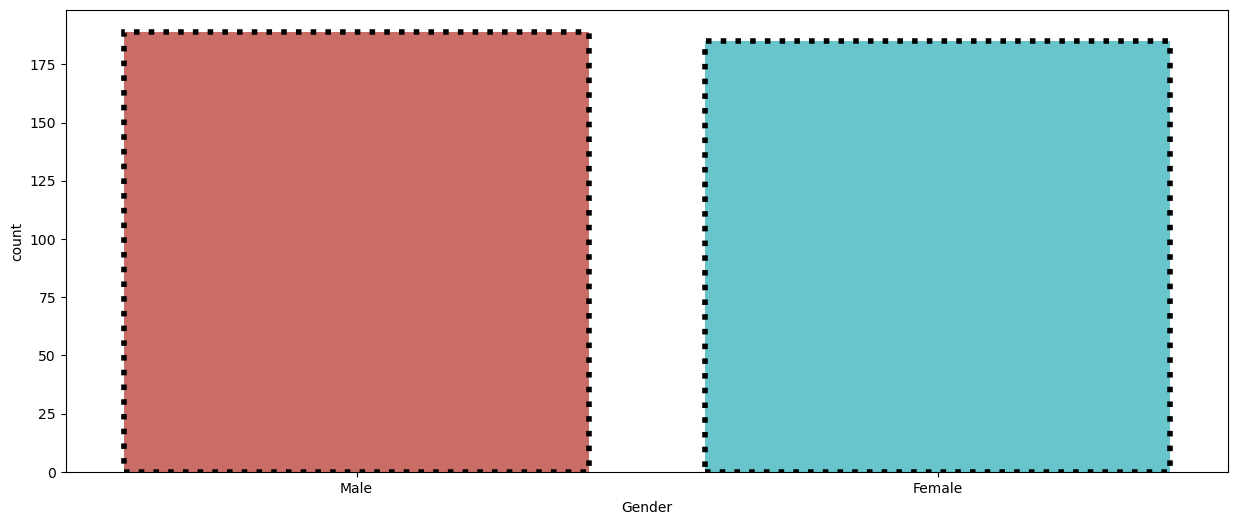

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Gender'], data = df,palette ='hls',edgecolor='black',linewidth=4,linestyle=":")
plt.xticks(rotation=0)
plt.show()

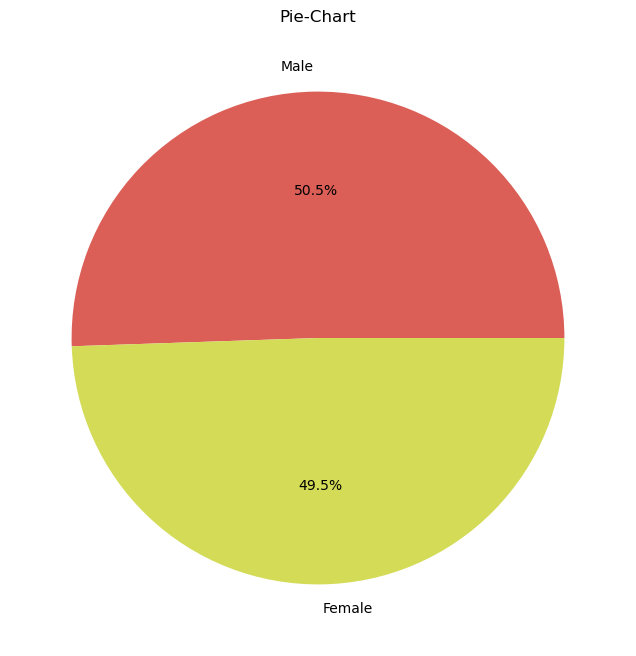

In [28]:
counts=df['Gender'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',colors=sns.color_palette('hls'))
plt.title("Pie-Chart")
plt.show()

In [29]:
import plotly.express as px
import plotly.graph_objects as go

In [30]:
fig = go.Figure(data=[go.Bar(x=df['Gender'].value_counts().index,y=df['Gender'].value_counts())])
fig.update_layout(title='Gender Bar Graph',xaxis_title='Gender',yaxis_title="Count")
fig.show()

In [31]:
fig=go.Figure(data=[go.Pie(labels=counts.index,values=counts)])
fig.update_layout(title='Gender Pie Graph',title_x=0.5)
fig.show()

In [32]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [33]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

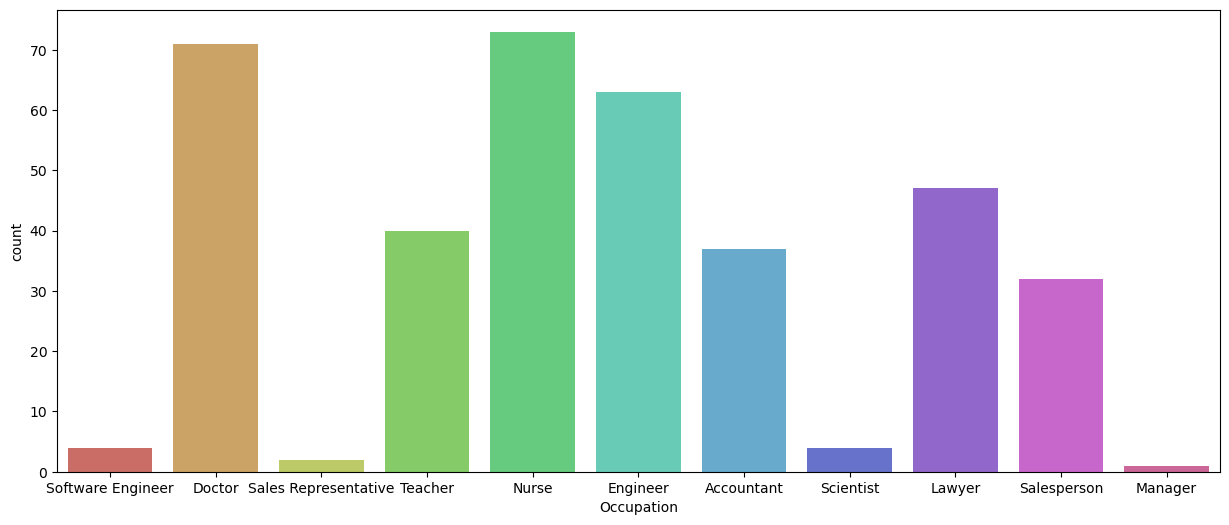

In [34]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Occupation'],data=df,palette='hls')
plt.show()

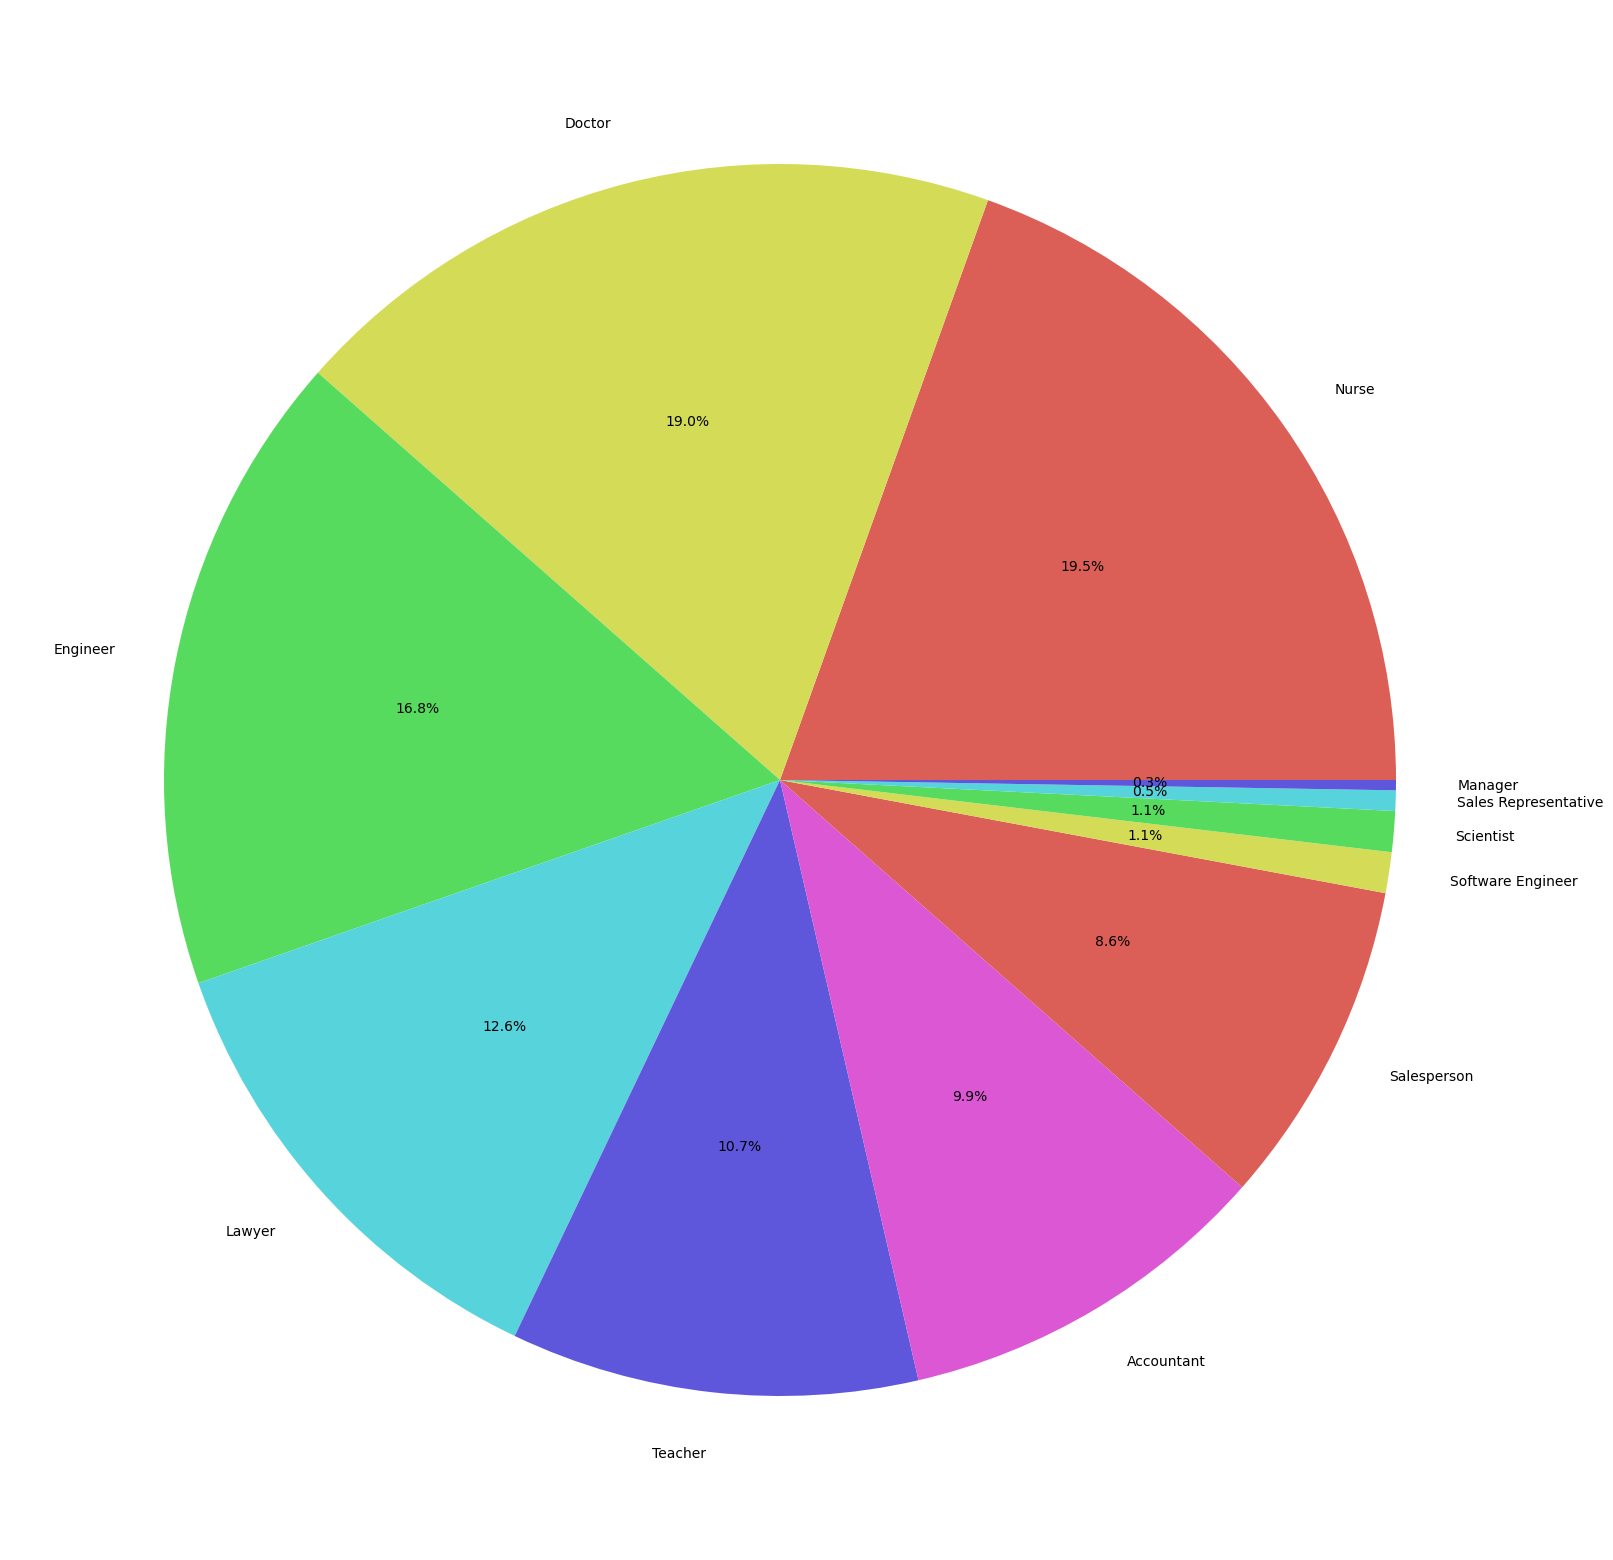

In [35]:
plt.figure(figsize=(25,20))
occupation_count=df['Occupation'].value_counts()
plt.pie(occupation_count,labels=occupation_count.index,autopct="%1.1f%%",colors=sns.color_palette('hls'))
plt.show()

In [36]:
# Bar graph using Go
fig = go.Figure(data=[go.Bar(x=occupation_count.index,y=occupation_count)])
fig.update_layout(title="Occupation Bar Graph",xaxis_title="Occupation",yaxis_title="count",title_x=0.5)
fig.show()

In [37]:
# Pie Graph using go
fig=go.Figure(data=[go.Pie(labels=occupation_count.index,values=occupation_count)])
fig.update_layout(title="Pie Graph",title_x=0.5,title_font=dict(size=40),)
fig.show()

In [38]:
df['Blood Pressure']

0      126/83
1      125/80
2      125/80
3      140/90
4      140/90
        ...  
369    140/95
370    140/95
371    140/95
372    140/95
373    140/95
Name: Blood Pressure, Length: 374, dtype: object

#systolic pressure

In [39]:
df[["Systolic Pressure","Diastolic Pressure"]] = df['Blood Pressure'].str.split('/',expand=True).astype(int)
df[["Systolic Pressure","Diastolic Pressure"]]


Systolic Pressure  Diastolic Pressure
0                  126                  83
1                  125                  80
2                  125                  80
3                  140                  90
4                  140                  90
..                 ...                 ...
369                140                  95
370                140                  95
371                140                  95
372                140                  95
373                140                  95

[374 rows x 2 columns]

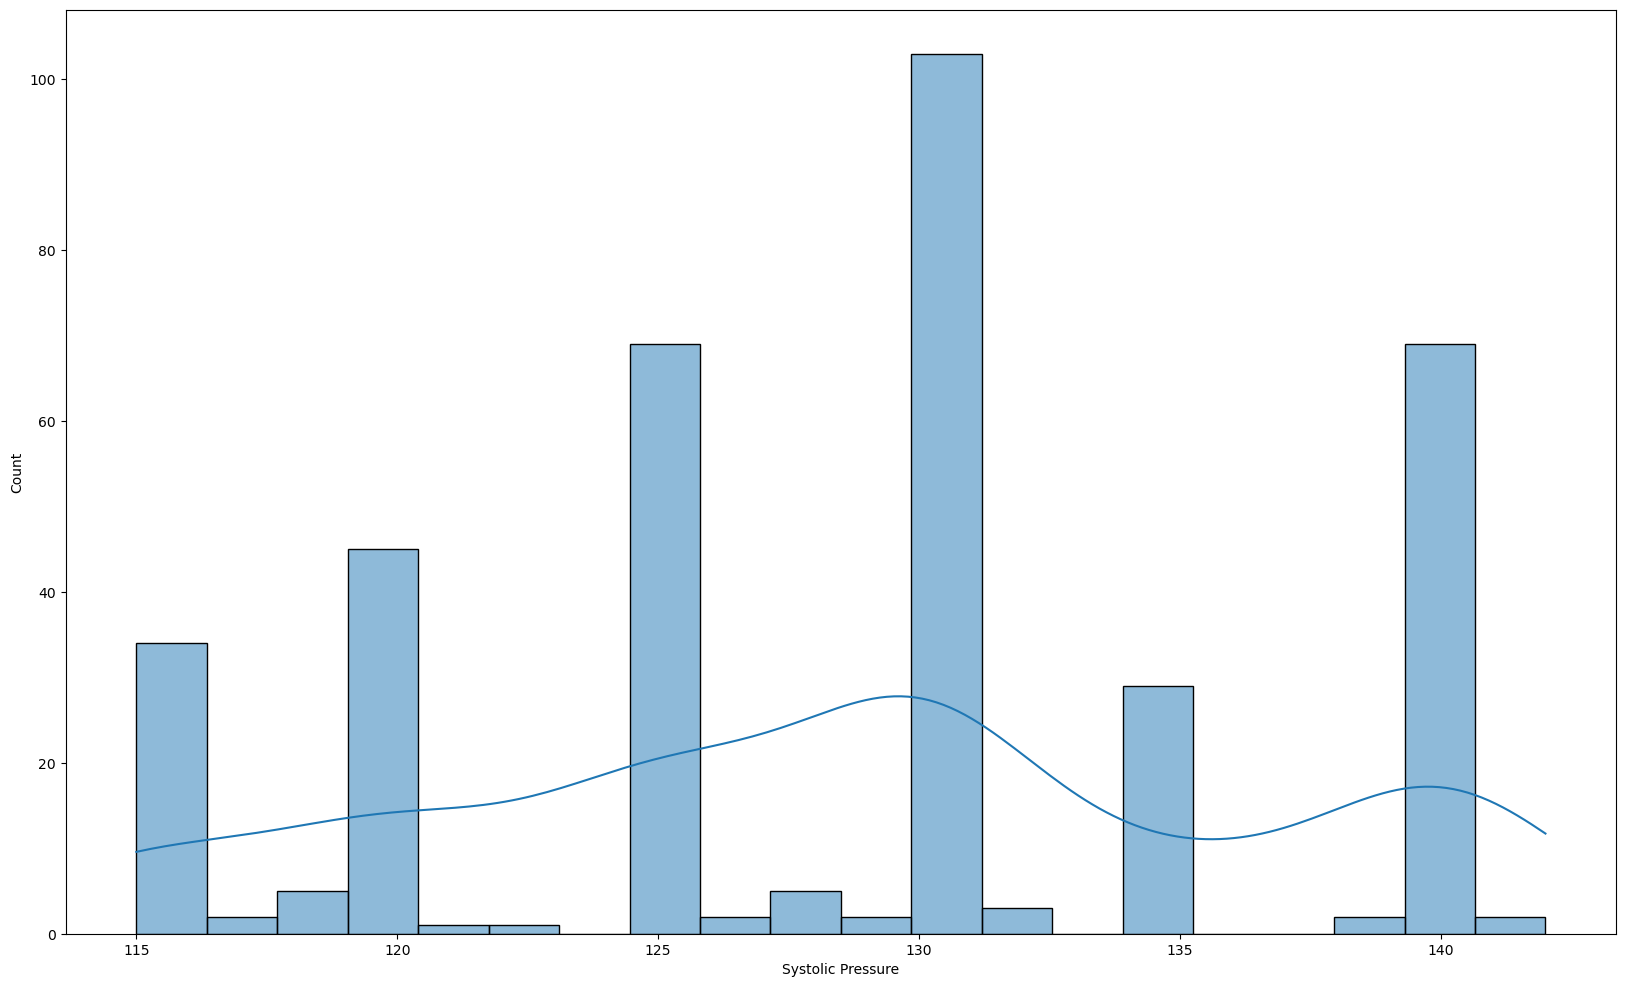

In [40]:
plt.figure(figsize=(20,12))
sns.histplot(df['Systolic Pressure'],bins=20,kde=True
            )
plt.show()

<Figure size 2000x1000 with 0 Axes>

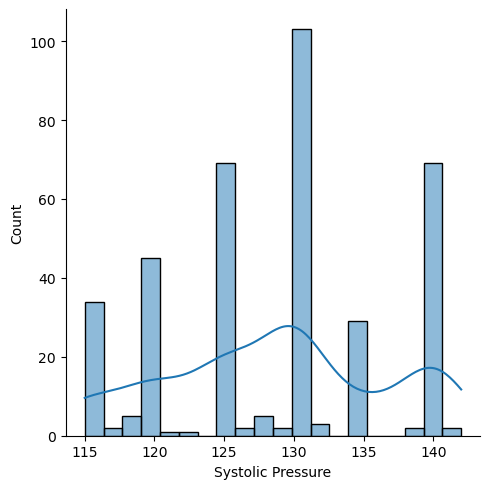

In [41]:
plt.figure(figsize=(20,10))
sns.displot(df['Systolic Pressure'],kde=True,bins=20)
plt.show()

In [42]:
df


Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps  Sleep Disorder  \
0           126/83          77         4200               0   
1           125/80          75        10000               0   
2           125/80          75        10000               0   
3           140/90          85         3000               2   
4           140/90          85         3000               2   
..             ...         ...          ...             ...   
369         140/95          68         7000               2   
370         140/95          68         7000               2   
371         140/95          68         7000               2   
372         140/95          68         7000               2   
373         140/95          68         7000               2   

     Systolic Pressure  Diastolic Pressure  
0                  126                  83  
1                  125                  80  
2                  125                  80  
3                  140                  90  
4                  140                  90  
..                 ...                 ...  
369                140                  95  
370                140                  95  
371                140                  95  
372                140                  95  
373                140                  95  

[374 rows x 15 columns]

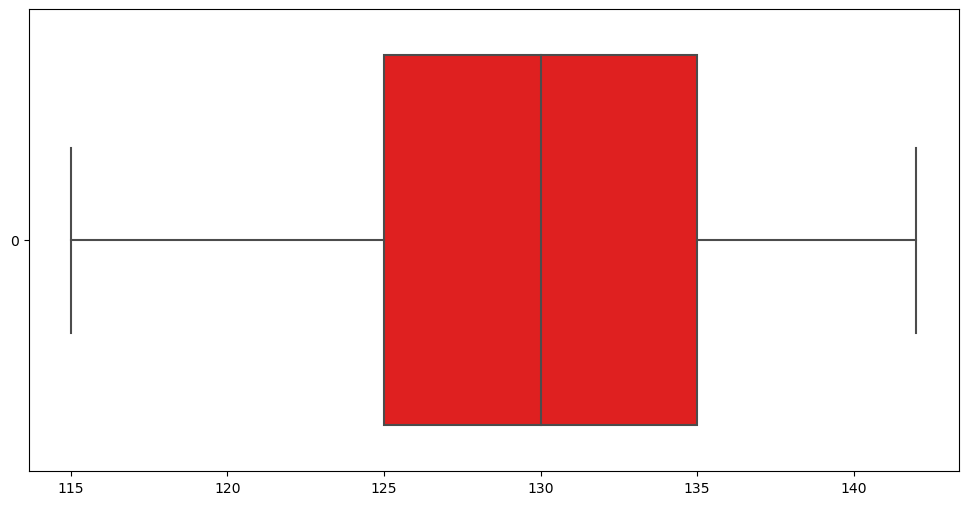

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Systolic Pressure'],color='red',orient="h")
plt.show()

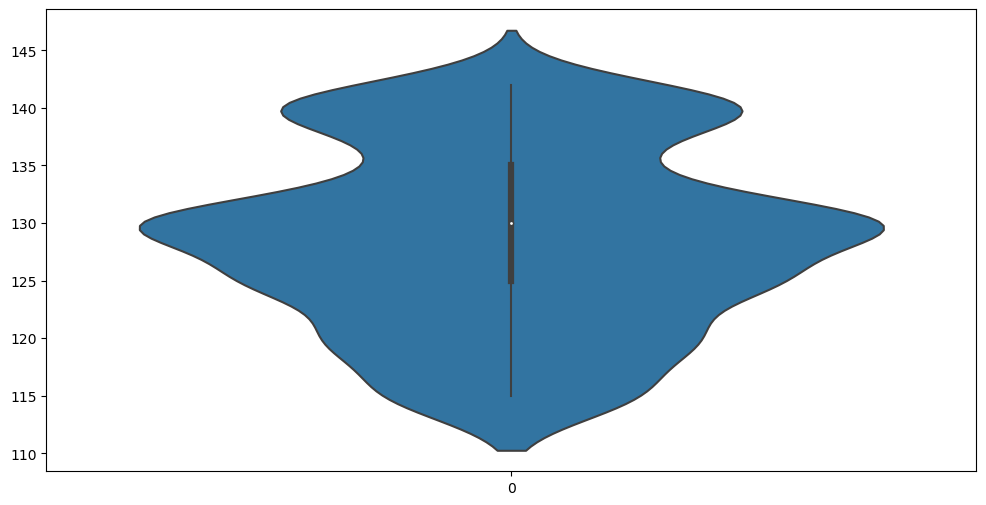

In [44]:
plt.figure(figsize=(12,6))
sns.violinplot(df["Systolic Pressure"])
plt.show()

# Average Systolic and Distolic Pressure

In [45]:
average_systolic_pressure=df['Systolic Pressure'].mean()
average_diastolic_pressure=df["Diastolic Pressure"].mean()
print(f"Average Systolic Pressure:{average_systolic_pressure}")
print(f"Average Diastolic Pressure:{average_diastolic_pressure}")

Average Systolic Pressure:128.55347593582889
Average Diastolic Pressure:84.64973262032086


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    int64  
 13  Systolic Pressure        374 non-null    int32  
 14  Diastolic Pressure       3

In [47]:
# Copy of dataframe with only selected columns 
df_selected=df.copy()
df_selected

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps  Sleep Disorder  \
0           126/83          77         4200               0   
1           125/80          75        10000               0   
2           125/80          75        10000               0   
3           140/90          85         3000               2   
4           140/90          85         3000               2   
..             ...         ...          ...             ...   
369         140/95          68         7000               2   
370         140/95          68         7000               2   
371         140/95          68         7000               2   
372         140/95          68         7000               2   
373         140/95          68         7000               2   

     Systolic Pressure  Diastolic Pressure  
0                  126                  83  
1                  125                  80  
2                  125                  80  
3                  140                  90  
4                  140                  90  
..                 ...                 ...  
369                140                  95  
370                140                  95  
371                140                  95  
372                140                  95  
373                140                  95  

[374 rows x 15 columns]

In [48]:
df_selected=df_selected.drop(['Person ID','Blood Pressure'],axis=1)
df_selected

Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0      Male   27     Software Engineer             6.1                 6   
1      Male   28                Doctor             6.2                 6   
2      Male   28                Doctor             6.2                 6   
3      Male   28  Sales Representative             5.9                 4   
4      Male   28  Sales Representative             5.9                 4   
..      ...  ...                   ...             ...               ...   
369  Female   59                 Nurse             8.1                 9   
370  Female   59                 Nurse             8.0                 9   
371  Female   59                 Nurse             8.1                 9   
372  Female   59                 Nurse             8.1                 9   
373  Female   59                 Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                         42             6   Overweight          77   
1                         60             8       Normal          75   
2                         60             8       Normal          75   
3                         30             8        Obese          85   
4                         30             8        Obese          85   
..                       ...           ...          ...         ...   
369                       75             3   Overweight          68   
370                       75             3   Overweight          68   
371                       75             3   Overweight          68   
372                       75             3   Overweight          68   
373                       75             3   Overweight          68   

     Daily Steps  Sleep Disorder  Systolic Pressure  Diastolic Pressure  
0           4200               0                126                  83  
1          10000               0                125                  80  
2          10000               0                125                  80  
3           3000               2                140                  90  
4           3000               2                140                  90  
..           ...             ...                ...                 ...  
369         7000               2                140                  95  
370         7000               2                140                  95  
371         7000               2                140                  95  
372         7000               2                140                  95  
373         7000               2                140                  95  

[374 rows x 13 columns]

In [49]:
df_encoded = pd.get_dummies(df_selected,columns=['Occupation','BMI Category','Gender'])
df_encoded

Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0     27             6.1                 6                       42   
1     28             6.2                 6                       60   
2     28             6.2                 6                       60   
3     28             5.9                 4                       30   
4     28             5.9                 4                       30   
..   ...             ...               ...                      ...   
369   59             8.1                 9                       75   
370   59             8.0                 9                       75   
371   59             8.1                 9                       75   
372   59             8.1                 9                       75   
373   59             8.1                 9                       75   

     Stress Level  Heart Rate  Daily Steps  Sleep Disorder  Systolic Pressure  \
0               6          77         4200               0                126   
1               8          75        10000               0                125   
2               8          75        10000               0                125   
3               8          85         3000               2                140   
4               8          85         3000               2                140   
..            ...         ...          ...             ...                ...   
369             3          68         7000               2                140   
370             3          68         7000               2                140   
371             3          68         7000               2                140   
372             3          68         7000               2                140   
373             3          68         7000               2                140   

     Diastolic Pressure  ...  Occupation_Salesperson  Occupation_Scientist  \
0                    83  ...                       0                     0   
1                    80  ...                       0                     0   
2                    80  ...                       0                     0   
3                    90  ...                       0                     0   
4                    90  ...                       0                     0   
..                  ...  ...                     ...                   ...   
369                  95  ...                       0                     0   
370                  95  ...                       0                     0   
371                  95  ...                       0                     0   
372                  95  ...                       0                     0   
373                  95  ...                       0                     0   

     Occupation_Software Engineer  Occupation_Teacher  BMI Category_Normal  \
0                               1                   0                    0   
1                               0                   0                    1   
2                               0                   0                    1   
3                               0                   0                    0   
4                               0                   0                    0   
..                            ...                 ...                  ...   
369                             0                   0                    0   
370                             0                   0                    0   
371                             0                   0                    0   
372                             0                   0                    0   
373                             0                   0                    0   

     BMI Category_Normal Weight  BMI Category_Obese  BMI Category_Overweight  \
0                             0                   0                        1   
1                             0                   0                        0   
2                             0                   0              

# Relation b/w variables

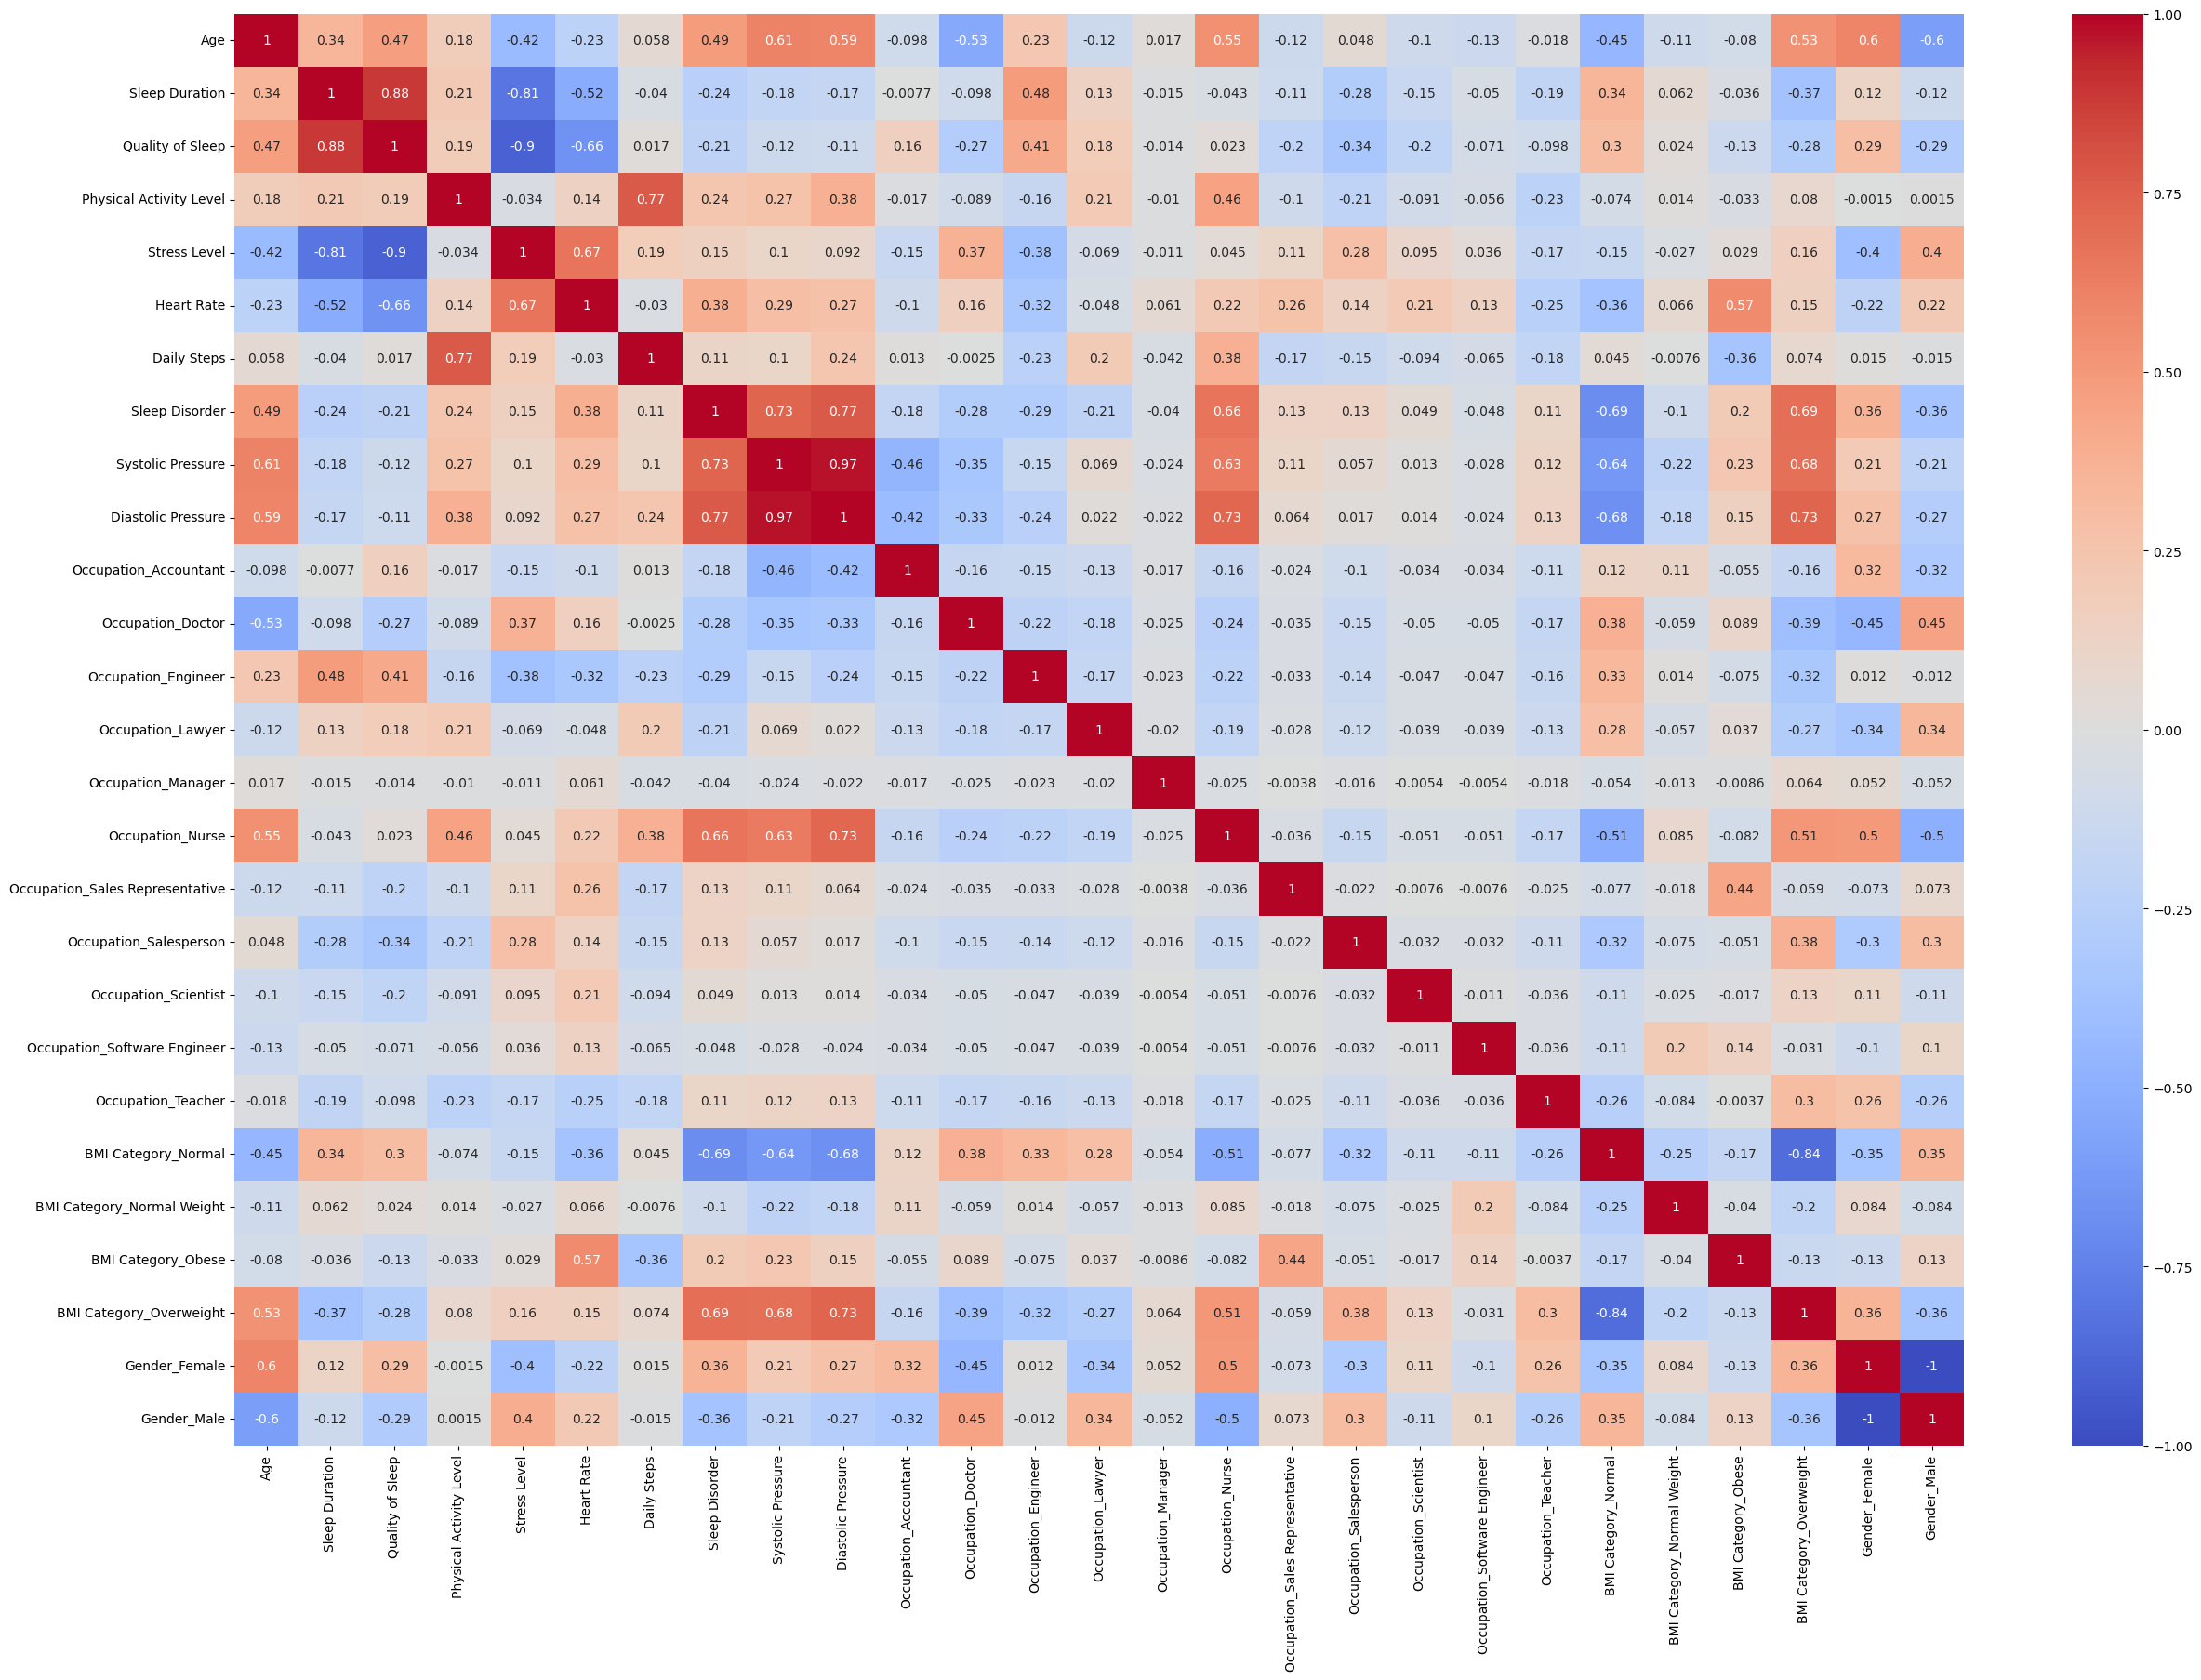

In [50]:
plt.figure(figsize=(30,20))
sns.heatmap(df_encoded.corr(),annot=True,cmap="coolwarm")
plt.show()

# Prediction Using Random Forest Algorithm

In [51]:
from sklearn.ensemble import RandomForestClassifier

# X is the feature matrix and y is target variable

In [52]:
X=df_encoded.drop('Sleep Disorder',axis=1) # Drop target variable from the feature
y=df_encoded['Sleep Disorder']

In [53]:
# Random forest classifier
clf = RandomForestClassifier()

In [54]:
clf.fit(X,y)

RandomForestClassifier()

# Feature importance scores

In [55]:
feature_importance = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature':X.columns,'Importance':feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance',ascending=False)
print(feature_importance_df)

                            Feature  Importance
7                 Systolic Pressure    0.147526
8                Diastolic Pressure    0.127659
23          BMI Category_Overweight    0.125170
20              BMI Category_Normal    0.114784
1                    Sleep Duration    0.099060
0                               Age    0.082566
3           Physical Activity Level    0.067528
6                       Daily Steps    0.043574
14                 Occupation_Nurse    0.040064
4                      Stress Level    0.030239
5                        Heart Rate    0.027996
2                  Quality of Sleep    0.025429
19               Occupation_Teacher    0.015142
16           Occupation_Salesperson    0.012145
10                Occupation_Doctor    0.007016
25                      Gender_Male    0.006511
11              Occupation_Engineer    0.004952
24                    Gender_Female    0.004304
22               BMI Category_Obese    0.003775
18     Occupation_Software Engineer    0

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
logistic_res=LogisticRegression()

In [59]:
logistic_res.fit(X_train,y_train)

C:\Users\aslam\OneDrive\Desktop\sample_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [60]:
y_pred = logistic_res.predict(X_test)

In [61]:
accuracy=accuracy_score(y_test,y_pred)

In [62]:
print("Accuracy:",accuracy)

Accuracy: 0.6933333333333334


In [63]:
report = classification_report(y_test,y_pred)
print(f"Classification report\n{report}")

Classification report
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        43
           1       0.42      0.31      0.36        16
           2       0.91      0.62      0.74        16

    accuracy                           0.69        75
   macro avg       0.68      0.60      0.63        75
weighted avg       0.69      0.69      0.68        75



In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dec_tree=DecisionTreeClassifier()

In [66]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
dec_tree_pred=dec_tree.predict(X_test)

In [68]:
accuracy1=accuracy_score(y_test,dec_tree_pred)
print(f"Accuracy:{accuracy1}")

Accuracy:0.88


In [69]:
classification_re=classification_report(y_test,y_pred)
print(f"Classfication report\n{classification_re}")

Classfication report
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        43
           1       0.42      0.31      0.36        16
           2       0.91      0.62      0.74        16

    accuracy                           0.69        75
   macro avg       0.68      0.60      0.63        75
weighted avg       0.69      0.69      0.68        75



In [70]:
import xgboost as xgb

In [71]:
xgb_classifier=xgb.XGBClassifier()

In [73]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [77]:
y_pred2=xgb_classifier.predict(X_test)

In [78]:
accuracy2 = accuracy_score(y_pred2,y_test)
print(f"Accuarcy:{accuracy2}")

Accuarcy:0.9066666666666666
